In this notebook I compare images of boulders based on their hold positions/relations.  

I guess since we dont know the absolute size of the bbox and the distances we want to normalize both together.

In [33]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import patches
from skimage import io

In [13]:
# set paths:

## The images from the master thesis are used as the DB images:
db_imgs_dir = 'thesis_raw_data'
db_bbox_csv_path = 'training_climbing_hall_raw.csv'

## The images that I took are used as both DB images and as "new" images to compare to the DB.
imgs_dir = 'imgs/resized0.25/'
imgs_bbox_dir = 'predictions_new_imgs_from_resized/model4/'

imgs_bbox_csvs_paths = glob(os.path.join(imgs_bbox_dir,'*.csv'))

In [15]:
# import bboxes csvs:

## db csv:
df_db = pd.read_csv(db_bbox_csv_path)

## imgs csvs

dfs_imgs = [pd.read_csv(p, index_col=0) for p in imgs_bbox_csvs_paths]

In [29]:
## combine imgs csvs into one df:

df_imgs = pd.DataFrame()
for i,df in enumerate(dfs_imgs):
    df["image"] = os.path.basename(imgs_bbox_csvs_paths[i][:-8])
    df_imgs = pd.concat((df_imgs, df))
    
df_imgs =df_imgs.reset_index(drop=True)

# Save it:
df_imgs.to_csv(os.path.join(imgs_bbox_dir,'predicted_bboxes_all_imgs.csv'))

In [31]:
len(imgs_bbox_csvs_paths)

16

In [32]:
df_imgs.head()

,idx,xmin,ymin,xmax,ymax,image
0,0,400,576,449,631,IMG_4427
1,1,78,110,262,313,IMG_4427
2,2,90,267,277,507,IMG_4427
3,3,273,132,396,308,IMG_4427
4,4,221,41,290,111,IMG_4427


In [51]:
def show_img_and_bboxes(img_name):
    if img_name.startswith('IMG'):
        df = df_imgs[df_imgs.image==img_name]
        im_path = os.path.join(imgs_dir, f'{img_name}.JPG')
    else:
        df = df_db[df_db.image==int(img_name)]
        im_path = os.path.join(db_imgs_dir, f'{img_name.zfill(4)}.jpg')
        
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.imshow(io.imread(im_path))
    
    for ii in df.index:

        rect = patches.Rectangle((df.at[ii,"xmin"], df.at[ii,"ymin"]), 
                               df.at[ii,"xmax"]-df.at[ii,"xmin"], 
                                 df.at[ii,"ymax"]-df.at[ii,"ymin"],
                               linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        

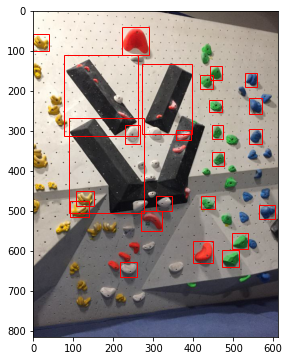

In [47]:
## Test the bounding boxes look correct on images and are in the same format for both datasets

show_img_and_bboxes('IMG_4427')

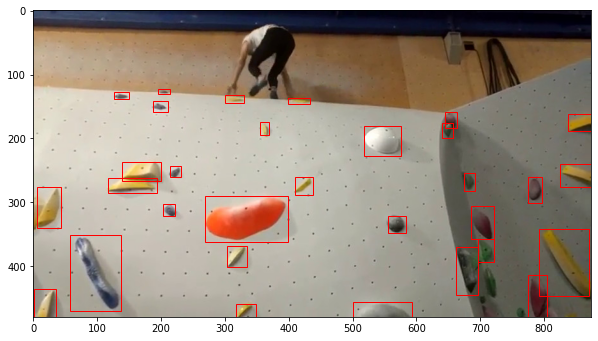

In [52]:
show_img_and_bboxes('1')

In [53]:
## per bounding box get center position, height and width